In [1]:
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from saturn_system import R_eq_saturn
from hyp_capture import Simulation
plt.rcParams['font.family'] = 'serif'

In [2]:
def is_hyperion(per_rat, e, lib_amp):
    Delta = per_rat*3/4 - 1
    return (np.abs(Delta) < 0.02) & (0.1 < e) & (e < 0.2) & (np.radians(0) < lib_amp) & (lib_amp < np.radians(100))

In [3]:
sim_dir = Path('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0.04_titan_e_0.04_per_1.35/')
sorted(list(sim_dir.glob('*')))

[PosixPath('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0.04_titan_e_0.04_per_1.35/constant_Q_3000.0_hyp_damp_realistic_NPA_100.0.pkl'),
 PosixPath('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0.04_titan_e_0.04_per_1.35/constant_Q_3000.0_hyp_damp_realistic_NPA_1000.0.pkl'),
 PosixPath('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0.04_titan_e_0.04_per_1.35/constant_Q_3000.0_hyp_damp_realistic_NPA_300.0.pkl'),
 PosixPath('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0.04_titan_e_0.04_per_1.35/constant_Q_3000.0_hyp_damp_realistic_NPA_3000.0.pkl'),
 PosixPath('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0.04_titan_e_0.04_per_1.35/constant_Q_3000.0_hyp_damp_realistic_NPA_inf.pkl'),
 PosixPath('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0.04_titan_e_0.04_per_1.35/realistic_lock_1e+10_1e+09_hyp_damp_realistic_NPA_100.0.pkl'),
 PosixPath('/mnt/data-big/mgoldberg/satellites/hyperion_capture/uniform_0

In [4]:
sims = pickle.load(open(sim_dir / 'realistic_lock_1e+10_1e+09_hyp_damp_realistic_NPA_40.0.pkl', 'rb'))
times, titan_orbit, hyp_orbits = sims.times, sims.titan_orbit, sims.hyp_orbits
print(f'{np.sum(np.any(np.isnan(hyp_orbits[-1]), axis=1))} of {hyp_orbits.shape[1]} ejected')
print(end_time := np.round(times[-1], 0), f'{end_time/np.log(titan_orbit[-1,0]/titan_orbit[0,0]):.1e}')

2 of 5 ejected
45000.0 6.7e+04


In [5]:
per_rat = (hyp_orbits[:, :, 0]/titan_orbit[:, 0][:, None])**1.5
phi = np.remainder(4*hyp_orbits[:,:,5] - 3*titan_orbit[:,5][:,None] - hyp_orbits[:,:,3], 2*np.pi)
phi_window = 100
# lib_amp = np.stack([np.sqrt(2)*np.std(phi[i-phi_window:i], axis=0) for i in range(phi_window, len(phi))])
lib_amp = np.repeat(np.std(np.reshape(phi, (-1, phi_window, 5)), axis=1), phi_window, axis=0)
is_hyp_times = is_hyperion(per_rat[:], hyp_orbits[:,:,1], lib_amp)
hyp_where = np.where(np.sum(is_hyp_times, axis=0) > 10)[0]
print('Remaining particles:', np.where(~np.any(np.isnan(hyp_orbits[-1]), axis=1))[0])
print('Hyperion particles:', hyp_where)

Remaining particles: [2 3 4]
Hyperion particles: [2 3 4]


Text(0, 0.5, 'Final period ratio')

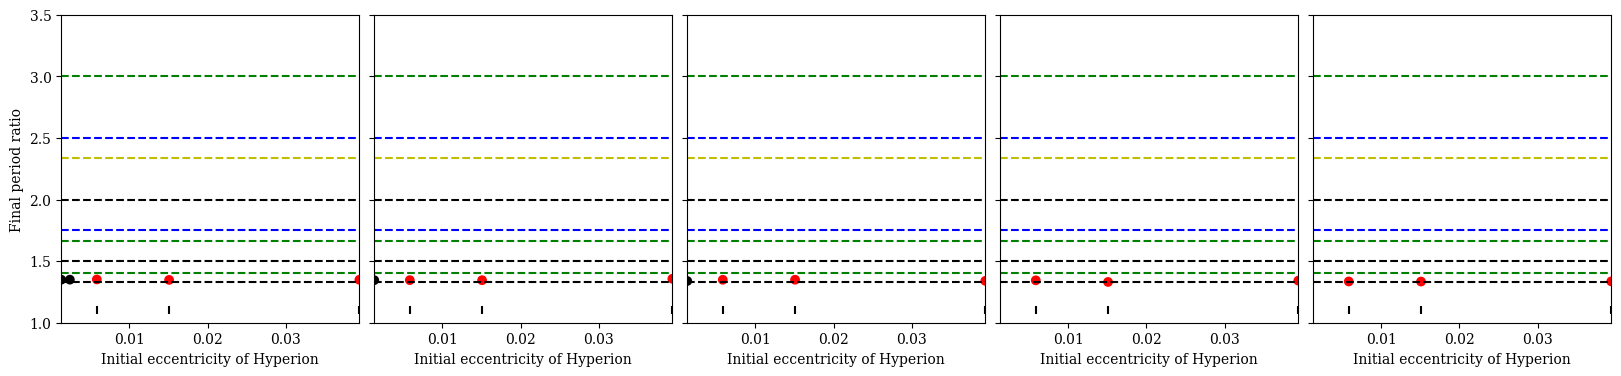

In [6]:
n_plots = 5
fig, axs = plt.subplots(1, n_plots, figsize=(4*n_plots, 4), sharex=True, sharey=True, gridspec_kw=dict(wspace=0.05, hspace=0))
for i, ax in enumerate(axs):
    idx = -1 if i == len(axs) - 1 else len(times)//n_plots*i
    ax.scatter(hyp_orbits[0,:,1], (hyp_orbits[idx,:,0]/titan_orbit[idx,0])**(1.5), c=np.where(np.any(is_hyp_times, axis=0), 'r', 'k'))
    ax.scatter(hyp_orbits[0,hyp_where,1], 1.1*np.ones_like(hyp_where), c='k', marker='|')
    ax.set_xlim(hyp_orbits[0,:,1].min(), hyp_orbits[0,:,1].max())
    ax.axhline(2/1, color='k', ls='--')
    ax.axhline(3/2, color='k', ls='--')
    ax.axhline(4/3, color='k', ls='--')
    ax.axhline(3/1, color='g', ls='--')
    ax.axhline(5/3, color='g', ls='--')
    ax.axhline(7/5, color='g', ls='--')
    ax.axhline(5/2, color='b', ls='--')
    ax.axhline(7/4, color='b', ls='--')
    ax.axhline(7/3, color='y', ls='--')
    ax.set_ylim(1, 3.5)
for ax in axs:
    ax.set_xlabel('Initial eccentricity of Hyperion')
axs[0].set_ylabel('Final period ratio')

Text(0.5, 0, 'Time [yr]')

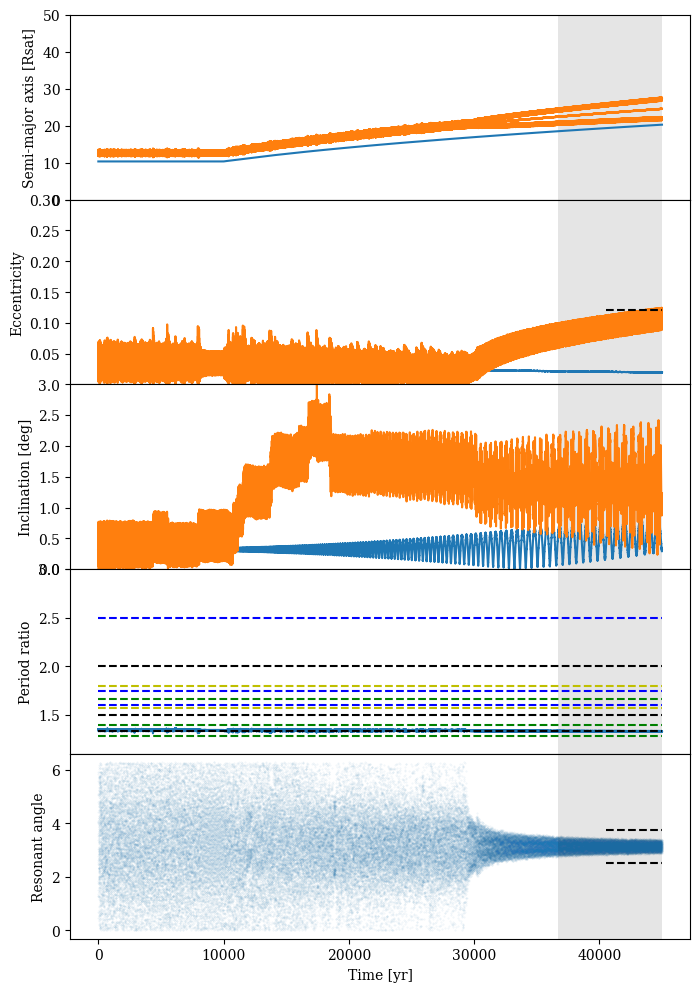

In [7]:
orb_idx = 2
orbit = hyp_orbits[:,orb_idx]
fig, axs = plt.subplots(5, 1, figsize=(8, 12), sharex=True, gridspec_kw={'hspace': 0})
axs[0].plot(times, titan_orbit[:,0]/R_eq_saturn)
axs[0].plot(times, orbit[:,0]/R_eq_saturn, c='C1')
axs[0].plot(times, orbit[:,0]/R_eq_saturn*(1-orbit[:,1]), c='C1')
axs[0].plot(times, orbit[:,0]/R_eq_saturn*(1+orbit[:,1]), c='C1')
axs[0].set_ylim(0, 50)
axs[1].plot(times, titan_orbit[:,1])
axs[1].plot(times, orbit[:,1])
axs[1].hlines(0.122, 0.9*max(times), max(times), color='k', ls='--')
axs[1].set_ylim(1e-3, 0.3)
axs[2].plot(times, np.degrees(titan_orbit[:,2]))
axs[2].plot(times, np.degrees(orbit[:,2]))
axs[2].set_ylim(0, 3)
axs[3].plot(times, (orbit[:,0]/titan_orbit[:,0])**1.5)
axs[3].hlines([2/1, 3/2, 4/3], xmin=0, xmax=max(times), linestyles='dashed', colors='k')
axs[3].hlines([5/3, 7/5, 9/7], xmin=0, xmax=max(times), linestyles='dashed', colors='g')
axs[3].hlines([5/2, 7/4, 8/5], xmin=0, xmax=max(times), linestyles='dashed', colors='b')
axs[3].hlines([9/5, 11/7], xmin=0, xmax=max(times), linestyles='dashed', colors='y')
axs[3].set_ylim(1.1, 3)
# phi = np.remainder(2*orbit[:,5] - 1*titan_orbit[:,5] - orbit[:,3], 2*np.pi)
# phi = np.remainder(3*orbit[:,5] - 2*titan_orbit[:,5] - orbit[:,3], 2*np.pi)
phi = np.remainder(4*orbit[:,5] - 3*titan_orbit[:,5] - orbit[:,3], 2*np.pi)
axs[4].scatter(times, phi, s=0.1, alpha=0.1)
# phi_inc = np.remainder(8*orbit[:,5] - 6*titan_orbit[:,5] - 2*orbit[:,4], 2*np.pi)
# phi_inc = np.remainder(8*orbit[:,5] - 6*titan_orbit[:,5] - titan_orbit[:,4] - orbit[:,4], 2*np.pi)
# phi_inc = np.remainder(8*orbit[:,5] - 6*titan_orbit[:,5] - 2*titan_orbit[:,4], 2*np.pi)
axs[4].hlines([np.pi-np.radians(36), np.pi+np.radians(36)], xmin=0.9*max(times), xmax=max(times), linestyles='dashed', colors='k')
times_is_hyp = times[np.where(is_hyp_times[:,orb_idx])[0]]
if len(times_is_hyp) > 0:
    for ax in axs:
        rect = patches.Rectangle((min(times_is_hyp), ax.get_ylim()[0]), max(times_is_hyp) - min(times_is_hyp), ax.get_ylim()[1]-ax.get_ylim()[0], 
                                linewidth=1, facecolor='k', alpha=0.1)
        ax.add_patch(rect)
axs[0].set_ylabel('Semi-major axis [Rsat]')
axs[1].set_ylabel('Eccentricity')
axs[2].set_ylabel('Inclination [deg]')
axs[3].set_ylabel('Period ratio')
axs[4].set_ylabel('Resonant angle')
axs[-1].set_xlabel('Time [yr]')

In [8]:
import rebound
sim = rebound.Simulation()
sim.units = ('msaturn', 'km', 'yr')
sims.titan_mig.compute_initial_a(times[-1], sim.G)/R_eq_saturn

10.303814432840065

Text(0.5, 0, 'Time [Gyr]')

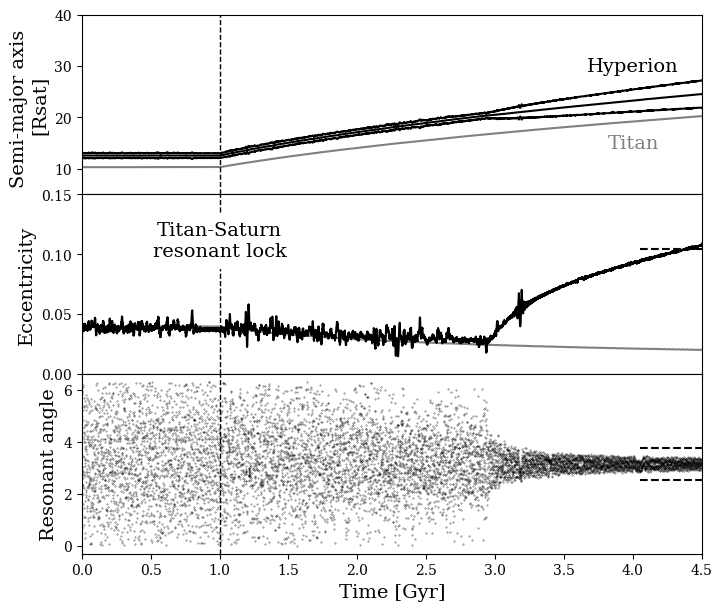

In [9]:
from scipy.signal import savgol_filter
window_size = 51
thinning = 10
sv_filter = lambda x: savgol_filter(x, window_size, 5)
orb_idx = 2
orbit = hyp_orbits[:,orb_idx]
fig, axs = plt.subplots(3, 1, figsize=(8, 7), sharex=True, gridspec_kw={'hspace': 0})

axs[0].set_xlim(0, 4.5)
axs[0].plot(times[::thinning]*sims.time_scaling/1e9, titan_orbit[::thinning,0]/R_eq_saturn, c='0.5')
axs[0].plot(times[::thinning]*sims.time_scaling/1e9, sv_filter(orbit[::thinning,0]/R_eq_saturn), c='k')
axs[0].plot(times[::thinning]*sims.time_scaling/1e9, sv_filter(orbit[::thinning,0]/R_eq_saturn*(1-orbit[::thinning,1])), c='k')
axs[0].plot(times[::thinning]*sims.time_scaling/1e9, sv_filter(orbit[::thinning,0]/R_eq_saturn*(1+orbit[::thinning,1])), c='k')
try:
    for ax in axs:
        ax.axvline(sims.titan_mig.t_lock*sims.time_scaling/1e9, ls='--', lw=1, c='k')
except AttributeError:
    pass
axs[0].set_ylim(5, 40)
axs[0].text(4, 15, 'Titan', ha='center', va='center', c='0.5', fontsize=14)
axs[0].text(4, 30, 'Hyperion', ha='center', va='center', c='k', fontsize=14)

axs[1].set_ylim(0, 0.15)
axs[1].plot(times[::thinning]*sims.time_scaling/1e9, sv_filter(titan_orbit[::thinning,1]), c='0.5')
axs[1].plot(times[::thinning]*sims.time_scaling/1e9, sv_filter(orbit[::thinning,1]), c='k')
try:
    axs[1].text(sims.titan_mig.t_lock*sims.time_scaling/1e9, 0.85*axs[1].get_ylim()[1], 'Titan-Saturn\nresonant lock', ha='center', va='top', backgroundcolor='w', fontsize=14)
except AttributeError:
    pass
equib_e = np.sqrt(-orbit[:,-1]/(6*titan_orbit[:,-1]))
equib_e[np.isnan(equib_e)] = 0
axs[1].hlines(0.104, xmin=0.9*axs[2].get_xlim()[1], xmax=axs[2].get_xlim()[1], color='k', ls='--')
axs[1].yaxis.set_ticks([0, 0.05, 0.1, 0.15])

phi_1 = np.remainder(4*orbit[:,5] - 3*titan_orbit[:,5] - titan_orbit[:,3], 2*np.pi)
phi_2 = np.remainder(4*orbit[:,5] - 3*titan_orbit[:,5] - orbit[:,3], 2*np.pi)
axs[2].scatter(times[::thinning]*sims.time_scaling/1e9, phi_2[::thinning], s=0.1, alpha=0.7, c='k')
axs[2].hlines([np.pi-np.radians(36), np.pi+np.radians(36)], xmin=0.9*axs[2].get_xlim()[1], xmax=axs[2].get_xlim()[1], linestyles='dashed', colors='k')

# times_is_hyp = times[np.where(is_hyp_times[:,orb_idx])[0]]
# if len(times_is_hyp) > 0:
#     for ax in axs:
#         rect = patches.Rectangle((min(times_is_hyp), ax.get_ylim()[0]), max(times_is_hyp) - min(times_is_hyp), ax.get_ylim()[1]-ax.get_ylim()[0], 
#                                 linewidth=1, facecolor='k', alpha=0.1)
#         ax.add_patch(rect)
axs[0].set_ylabel('Semi-major axis \n[Rsat]', fontsize=14)
axs[1].set_ylabel('Eccentricity', fontsize=14)
axs[2].set_ylabel('Resonant angle', fontsize=14)
axs[-1].set_xlabel('Time [Gyr]', fontsize=14)
# plt.savefig(f'../figs/hyperion_capture_Q_{sims.hyp_damping.Q_hyp}.pdf', bbox_inches='tight')

Text(0, 0.5, '$\\dot{\\varpi}$ frequency [yr$^{-1}$]')

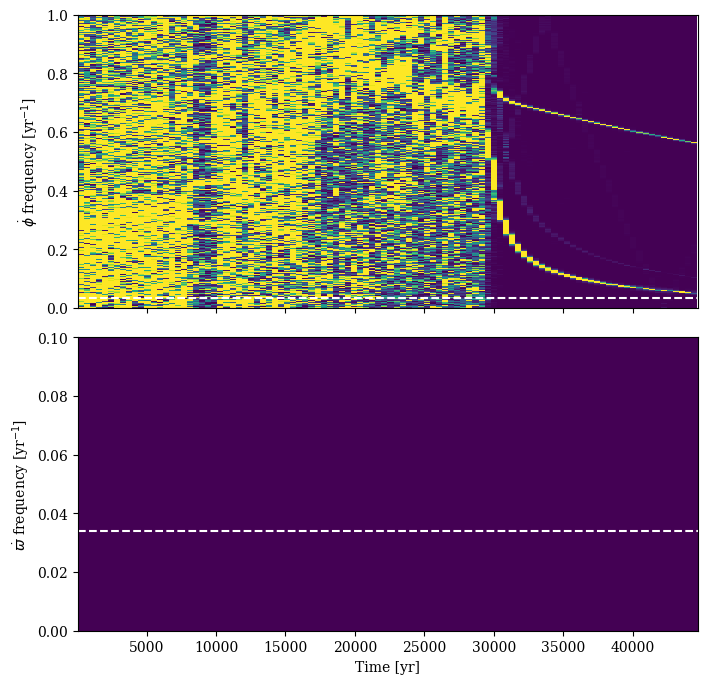

In [10]:
from scipy.signal import spectrogram
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={'hspace': 0.1})
f, t, Sxx = spectrogram(phi, fs=1/(times[1]-times[0]), nperseg=1000)
axs[0].pcolormesh(t, f, Sxx, cmap='viridis', vmax=1)
axs[0].set_ylim(0, 1)
axs[0].axhline(1/29.447, color='w', ls='--')
# axs[0].set_xlabel('Time [yr]')
axs[0].set_ylabel('$\dot{\phi}$ frequency [yr$^{-1}$]')

f, t, Sxx = spectrogram(orbit[:,2], fs=1/(times[1]-times[0]), nperseg=2000)
axs[1].pcolormesh(t, f, Sxx, cmap='viridis', vmax=1000)
axs[1].set_ylim(0, .1)
axs[1].axhline(1/29.447, color='w', ls='--')
axs[1].set_xlabel('Time [yr]')
axs[1].set_ylabel(r'$\dot{\varpi}$ frequency [yr$^{-1}$]')